Number of instances N: 960
Number of instances A: 240


/var/folders/c6/nz55bt8x0yj_h00mvgjqwpvm0000gn/T/ipykernel_43342/43364436.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


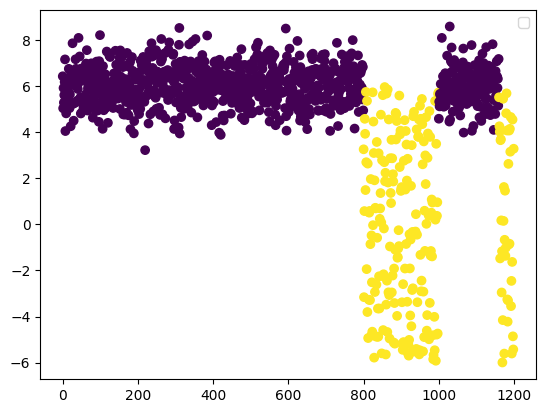

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('anomaly_data.csv')

X, y = df.iloc[:, :2], df.iloc[:, -1]

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='viridis')
plt.legend()
print(f'Number of instances N: {df[df['y'] == 0.0].shape[0]}')
print(f'Number of instances A: {df[df['y'] == 1.0].shape[0]}')

0.8235443940706025
0.47543629862524744


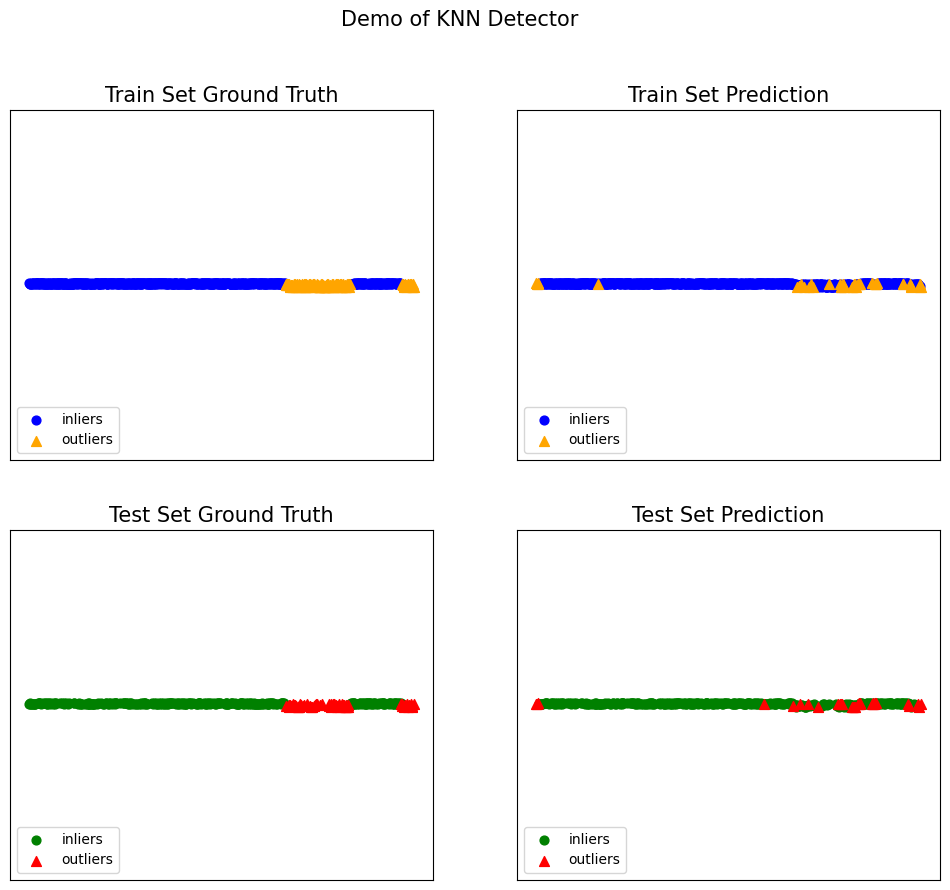

In [33]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
clf = KNN(n_neighbors=10, method='largest', metric='euclidean')
clf.fit(train_X)

y_test_scores = clf.decision_function(test_X) # outlier scores
y_test_pred = clf.predict(test_X) # outlier labels (0 or 1)
y_train_pred = clf.predict(train_X) # outlier labels (0 or 1)

print(roc_auc_score(test_y, y_test_scores))

print(average_precision_score(test_y, y_test_scores))


visualize('KNN', train_X, train_y, test_X, test_y, y_train_pred, y_test_pred, show_figure=True, save_figure=True)


In [16]:
# Exploring the effect of different n_neighbors and methods
from sklearn.metrics import roc_auc_score, average_precision_score

best_auc = 0
best_ap = 0
best_n = 0
best_method = ""

# Define the range of n_neighbors and methods
n_neighbors = range(2, 21, 2)
methods = ["largest", "mean", "median"]

# Loop over the parameters
for n in n_neighbors:
    for method in methods:
        clf = KNN(n_neighbors=n, method=method, metric="euclidean")
        clf.fit(train_X)
        y_test_scores = clf.decision_function(test_X)

        auc = roc_auc_score(test_y, y_test_scores)
        ap = average_precision_score(test_y, y_test_scores)

        # if auc > best_auc:
        #     best_auc = auc
        #     best_n = n
        #     best_method = method

        # if ap > best_ap:
        #     best_ap = ap

        if ap > best_ap:
            best_ap = ap
            best_n = n
            best_method = method

        if auc > best_auc:
            best_auc = auc
        print(f'n_neighbors={n}, method={method}, ROC-AUC={auc:.4f}, AP={ap:.4f}')

print(f'Best n_neighbors={best_n}, Best method={best_method}, Best ROC-AUC={best_auc}, Best AP={best_ap}')


n_neighbors=2, method=largest, ROC-AUC=0.8768, AP=0.7182
n_neighbors=2, method=mean, ROC-AUC=0.8788, AP=0.7605
n_neighbors=2, method=median, ROC-AUC=0.8788, AP=0.7605
n_neighbors=4, method=largest, ROC-AUC=0.9033, AP=0.7639
n_neighbors=4, method=mean, ROC-AUC=0.9288, AP=0.8136
n_neighbors=4, method=median, ROC-AUC=0.9112, AP=0.7688
n_neighbors=6, method=largest, ROC-AUC=0.9040, AP=0.6921
n_neighbors=6, method=mean, ROC-AUC=0.9422, AP=0.8184
n_neighbors=6, method=median, ROC-AUC=0.9179, AP=0.7880
n_neighbors=8, method=largest, ROC-AUC=0.8674, AP=0.6052
n_neighbors=8, method=mean, ROC-AUC=0.9379, AP=0.7886
n_neighbors=8, method=median, ROC-AUC=0.9182, AP=0.7806
n_neighbors=10, method=largest, ROC-AUC=0.8235, AP=0.4754
n_neighbors=10, method=mean, ROC-AUC=0.9282, AP=0.7416
n_neighbors=10, method=median, ROC-AUC=0.9161, AP=0.7459
n_neighbors=12, method=largest, ROC-AUC=0.7638, AP=0.3926
n_neighbors=12, method=mean, ROC-AUC=0.9136, AP=0.6822
n_neighbors=12, method=median, ROC-AUC=0.9035, AP

In [23]:
from pyod.models.lof import LOF

# Define the range of n_neighbors
n_neighbors = range(2, 21, 2)
best_n = 0


for n in n_neighbors:
    clf_lof = LOF(n_neighbors=n, metric='euclidean')
    clf_lof.fit(train_X)

    y_test_scores = clf_lof.decision_function(test_X)

    auc = roc_auc_score(test_y, y_test_scores)
    ap = average_precision_score(test_y, y_test_scores)

    if auc > best_auc:
        best_auc = auc
        best_n = n

        if ap > best_ap:
            best_ap = ap
    print(f'n_neighbors={n}, ROC-AUC={auc:.4f}, AP={ap:.4f}')

print(f'Best n_neighbors={best_n}, Best ROC-AUC={best_auc}, Best AP={best_ap}')

n_neighbors=2, ROC-AUC=0.4544, AP=0.2585
n_neighbors=4, ROC-AUC=0.5274, AP=0.2652
n_neighbors=6, ROC-AUC=0.4794, AP=0.2125
n_neighbors=8, ROC-AUC=0.4457, AP=0.1792
n_neighbors=10, ROC-AUC=0.4421, AP=0.1714
n_neighbors=12, ROC-AUC=0.4747, AP=0.1802
n_neighbors=14, ROC-AUC=0.4718, AP=0.1788
n_neighbors=16, ROC-AUC=0.4656, AP=0.1817
n_neighbors=18, ROC-AUC=0.4655, AP=0.1772
n_neighbors=20, ROC-AUC=0.4843, AP=0.1843
Best n_neighbors=0, Best ROC-AUC=0.5274311038663337, Best AP=0.26515242853403787


Number of instances N: 1655
Number of instances A: 176


/var/folders/c6/nz55bt8x0yj_h00mvgjqwpvm0000gn/T/ipykernel_43342/1889874280.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


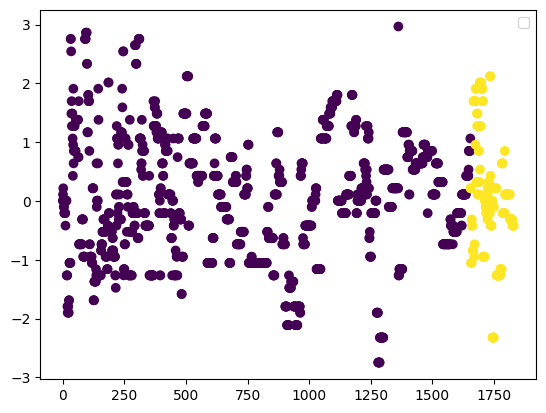

In [25]:
df_cardio = pd.read_csv('cardio.csv')

X, y = df_cardio.iloc[:, :20], df_cardio.iloc[:, -1]

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='viridis')
plt.legend()
print(f'Number of instances N: {df_cardio[df_cardio['y'] == 0.0].shape[0]}')
print(f'Number of instances A: {df_cardio[df_cardio['y'] == 1.0].shape[0]}')

In [27]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)
clf = KNN(n_neighbors=10, method='largest', metric='euclidean')
clf.fit(train_X)

y_test_scores = clf.decision_function(test_X) # outlier scores
y_test_pred = clf.predict(test_X) # outlier labels (0 or 1)
y_train_pred = clf.predict(train_X) # outlier labels (0 or 1)

print(roc_auc_score(test_y, y_test_scores))

print(average_precision_score(test_y, y_test_scores))


0.6595744680851063
0.23163542987387914


In [28]:
# Load the real-world dataset
df_cardio = pd.read_csv('cardio.csv')

# Separate features and labels
X_cardio = df_cardio.iloc[:, :-1]  # All columns except the last one
y_cardio = df_cardio.iloc[:, -1]   # The last column as the label

# Train and compare different algorithms
from pyod.models.iforest import IForest


# Initialize the models
clf_knn = KNN(n_neighbors=10)
clf_lof = LOF(n_neighbors=10)
clf_iforest = IForest()

# Fit the models
models = [clf_knn, clf_lof, clf_iforest]
model_names = ['KNN', 'LOF', 'IForest']

for clf, name in zip(models, model_names):
    clf.fit(X_cardio)
    y_test_scores = clf.decision_function(X_cardio)
    
    # Evaluate the performance
    roc_auc = roc_auc_score(y_cardio, y_test_scores)
    average_precision = average_precision_score(y_cardio, y_test_scores)
    
    print(f'{name} ROC-AUC: {roc_auc:.4f}, AP: {average_precision:.4f}')


KNN ROC-AUC: 0.7087, AP: 0.3429
LOF ROC-AUC: 0.5627, AP: 0.2094
IForest ROC-AUC: 0.9167, AP: 0.5229


/Users/linus/Library/CloudStorage/OneDrive-Uppsalauniversitet/Data mining I/data_mine/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
